<a href="https://colab.research.google.com/github/joaovitordeon/ENEM_2016_codenation/blob/master/Keras_codenation_ENEM_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
! ls "/content/drive/My Drive/Colab Notebooks/codenation_ENEM"

best_codenation_ENEM_2016.ipynb  test.csv  train.csv


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/codenation_ENEM/train.csv")

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/codenation_ENEM/test.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [0]:
df_test.info()

**Transformar as colunas de treino iguais as de test. **

**Transformar colunas categoricas(dummies)**

**Verificar os as colunas com muitos dados faltantes**

In [0]:
colunas = list(df_test.columns)

In [0]:
colunas.append("NU_NOTA_MT")

In [0]:
df_train = df_train[colunas]

In [0]:
df_train.info()

**SG_UF_RESIDENCIA inútil para o problema visto que ja temos o numero das unidades federativas**

**TP_ENSINO, TP_DEPENDENCIA_ADM_ESC, Q027  com muitos dados faltantes**

**Colunas CO_PROVA_... são das cores das provas, o que não agrega nada ao modelo**

**Transformar os dados categoricos(dummies)**

In [0]:
#criando copia dos df'sinfo()
train = df_train.copy()
test = df_test.copy()

train_aux = train.copy()
test_aux = test.copy()

**apagar as linhas que tem NU_NOTA_MT como NANs**

In [0]:
train = train[~np.isnan(train.NU_NOTA_MT)]

In [0]:
train.info()

In [0]:
train.drop(columns=['NU_INSCRICAO','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO',\
                    'SG_UF_RESIDENCIA','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC','CO_PROVA_CN', 'CO_PROVA_CH', \
                    'CO_PROVA_LC','CO_PROVA_MT'], inplace=True)

test.drop(columns=['NU_INSCRICAO','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO',\
                   'SG_UF_RESIDENCIA','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'CO_PROVA_CN', 'CO_PROVA_CH', \
                   'CO_PROVA_LC','CO_PROVA_MT'], inplace=True)

In [16]:
train.columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

In [0]:
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [0]:
train.dropna(axis='index', inplace=True)
test.dropna(axis='index', inplace=True)

In [0]:
train.info()

In [0]:
test.info()

In [21]:
'NU_NOTA_MT' in train.columns

True

In [22]:
scaler1 = MinMaxScaler()

train_a = scaler1.fit_transform(train.drop(columns=['NU_NOTA_MT']))
train_a = pd.DataFrame(train_a, columns=train.columns[:-1])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
test_a = scaler1.transform(test)
test_a = pd.DataFrame(test_a, columns = test.columns)
test_a = pd.concat([test_aux.NU_INSCRICAO, test_a] , axis='columns')

In [24]:
'NU_INSCRICAO' in test_a.columns

True

In [0]:
scaler2 = MinMaxScaler()

X_train = train_a

y_train = scaler2.fit_transform(train.NU_NOTA_MT.values.reshape(-1,1))

X_test = test_a.drop(columns='NU_INSCRICAO')

In [0]:
X_train.info()

In [27]:
model = Sequential()
model.add(Dense(89, input_dim=89, kernel_initializer='normal', activation='relu'))
model.add(Dense(89, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 89)                8010      
_________________________________________________________________
dense_1 (Dense)              (None, 89)                8010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 90        
Total params: 16,110
Trainable params: 16,110
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

Instructions for updating:
Use tf.cast instead.


In [29]:
history = model.fit(X_train, y_train, epochs=150, batch_size=20,  verbose=1, validation_split=0.05)

Train on 9592 samples, validate on 505 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
9592/9592 [==============================] - 2s 254us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2/150
9592/9592 [==============================] - 1s 154us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 3/150
9592/9592 [==============================] - 2s 157us/sample - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 4/150
9592/9592 [==============================] - 1s 155us/sample - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 5/150
9592/9592 [==============================] - 1s 156us/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 6/150
9592/9592 [==============================] - 1s 

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


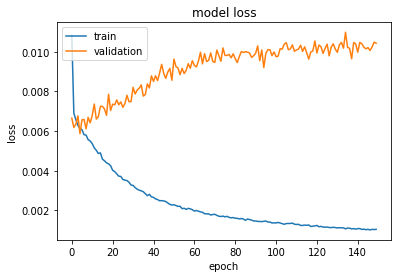

In [30]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks([])
plt.yticks([])
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**seems that we have a overfitting **

In [0]:
y_pred = model.predict(X_test)
y_pred = scaler2.inverse_transform(y_pred.reshape(-1,1))

In [0]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test_a.NU_INSCRICAO
answer['NU_NOTA_MT'] = y_pred

In [33]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,488.990784
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,434.522919
2,b38a03232f43b11c9d0788abaf060f7366053b6d,450.096588
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,504.431274
4,715494628a50142ce8cb17191cfe6d0f3cae0934,503.874512


In [0]:
answer.to_csv('answer.csv', index=False)

In [0]:
from google.colab import files
#files.download('answer.csv')